# Paper image

In [1]:
import configparser

import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd
import scipy.signal
import wfdb

In [2]:
config = configparser.ConfigParser()
config.read("config.ini")
src_freq = config.getint("data_preprocessing", "src_freq")
dst_freq = config.getint("data_preprocessing", "dst_freq")
skip_time = config.getint("data_preprocessing", "skip_time")

## Dataset

In [3]:
normal_rhythm, _ = wfdb.rdsamp("dataset/training2017/A00001")
normal_rhythm = np.squeeze(normal_rhythm)
af_rhythm, _ = wfdb.rdsamp("dataset/training2017/A00004")
af_rhythm = np.squeeze(af_rhythm)
other_rhythm, _ = wfdb.rdsamp("dataset/training2017/A00077")
other_rhythm = np.squeeze(other_rhythm)
noisy_recording, _ = wfdb.rdsamp("dataset/training2017/A01246")
noisy_recording = np.squeeze(noisy_recording)

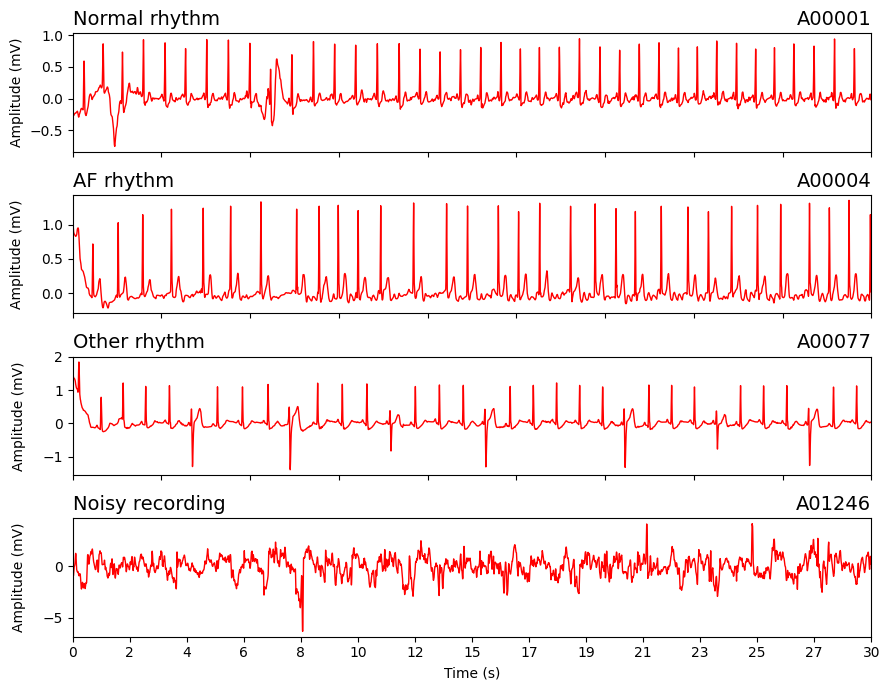

In [4]:
fontsize = 14
fig, ax = plt.subplots(4, 1, figsize=(9, 7))

ax[0].plot(normal_rhythm, color="r", linewidth=1)
ax[0].set_title("Normal rhythm", loc="left", fontsize=fontsize)
ax[0].set_title("A00001", loc="right", fontsize=fontsize)
ax[0].set_ylabel("Amplitude (mV)")
ax[0].set_xlim(0, normal_rhythm.size)
ax[0].tick_params(labelbottom=False)

ax[1].plot(af_rhythm, color="r", linewidth=1)
ax[1].set_title("AF rhythm", loc="left", fontsize=fontsize)
ax[1].set_title("A00004", loc="right", fontsize=fontsize)
ax[1].set_ylabel("Amplitude (mV)", labelpad=12)
ax[1].set_xlim(0, af_rhythm.size)
ax[1].tick_params(labelbottom=False)

ax[2].plot(other_rhythm, color="r", linewidth=1)
ax[2].set_title("Other rhythm", loc="left", fontsize=fontsize)
ax[2].set_title("A00077", loc="right", fontsize=fontsize)
ax[2].set_ylabel("Amplitude (mV)", labelpad=12)
ax[2].set_xlim(0, other_rhythm.size)
ax[2].tick_params(labelbottom=False)

ax[3].plot(noisy_recording, color="r", linewidth=1)
ax[3].set_title("Noisy recording", loc="left", fontsize=fontsize)
ax[3].set_title("A01246", loc="right", fontsize=fontsize)
ax[3].set_xlabel("Time (s)")
ax[3].set_ylabel("Amplitude (mV)", labelpad=12)
ax[3].set_xlim(0, noisy_recording.size)
ticks_num = noisy_recording.size // src_freq // 2
ax[3].set_xticks(np.linspace(0, noisy_recording.size, ticks_num))
ax[3].set_xticklabels(np.linspace(0, noisy_recording.size / src_freq, ticks_num, dtype=int))

plt.tight_layout()
plt.show()

## Preprocessing

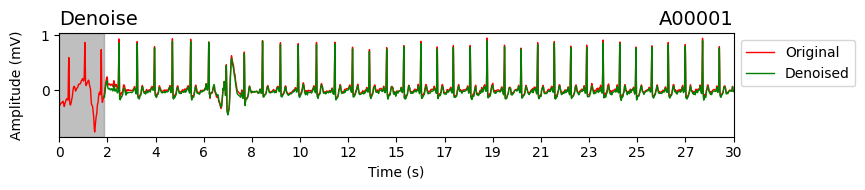

In [164]:
# load signal
original_signal, _ = wfdb.rdsamp("dataset/training2017/A00001")
original_signal = np.squeeze(original_signal)

# skip first few seconds
skip_length = skip_time * src_freq
denoised_signal = original_signal[skip_length :]

# pad 1 second to both ends to avoid edge effects during filtering
denoised_signal = np.pad(denoised_signal, src_freq * 1, "constant", constant_values=0)

# denoise
sos = scipy.signal.butter(2, [0.5, 40], btype="bandpass", output="sos", fs=src_freq)
denoised_signal = scipy.signal.sosfiltfilt(sos, denoised_signal)

# remove padding
denoised_signal = denoised_signal[src_freq * 1 : -src_freq * 1]

fig, ax = plt.subplots(1, 1, figsize=(9, 2))
ax.plot(original_signal, color="r", linewidth=1, label="Original")
ax.plot(np.arange(skip_length, denoised_signal.size + skip_length), denoised_signal, color="g", linewidth=1, label="Denoised")
ax.set_title("Denoise", loc="left", fontsize=fontsize)
ax.set_title("A00001", loc="right", fontsize=fontsize)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (mV)", labelpad=12)
ax.set_xlim(0, original_signal.size)
ticks_num = original_signal.size // src_freq // 2
ax.set_xticks(np.linspace(0, original_signal.size, ticks_num))
ax.set_xticklabels(np.linspace(0, original_signal.size // src_freq, ticks_num, dtype=int))
ax.legend(bbox_to_anchor=(1, 1))
ax.axvspan(0, skip_length, color="gray", alpha=0.5)
plt.tight_layout()
plt.show()


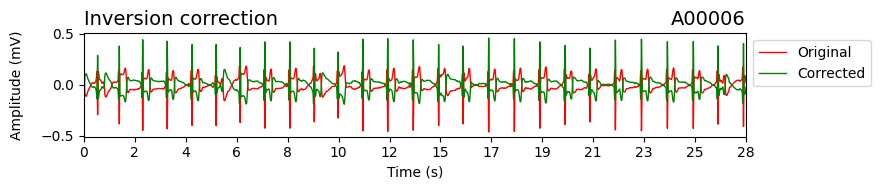

In [122]:
# load signal
signal, _ = wfdb.rdsamp("dataset/training2017/A00006")
signal = np.squeeze(signal)

# skip first few seconds
signal = signal[skip_time * src_freq :]

# inversion correction
corrected_signal, _ = nk.ecg_invert(signal, sampling_rate=src_freq)

fig, ax = plt.subplots(1, 1, figsize=(9, 2))
ax.plot(signal, color="r", linewidth=1, label="Original")
ax.plot(corrected_signal, color="g", linewidth=1, label="Corrected")
ax.set_title("Inversion correction", loc="left", fontsize=fontsize)
ax.set_title("A00006", loc="right", fontsize=fontsize)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (mV)", labelpad=12)
ax.set_xlim(0, signal.size)
ticks_num = signal.size // src_freq // 2
ax.set_xticks(np.linspace(0, signal.size, ticks_num))
ax.set_xticklabels(np.linspace(0, signal.size / src_freq, ticks_num, dtype=int))
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()